
Problem-2)
Extract reviews of any product from ecommerce website like amazon

Perform emotion mining

In [1]:

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup
#from selenium import webdriver

In [6]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import string # special operations on strings
import spacy # language models
import re
from wordcloud import WordCloud

In [2]:
titan_watch=[]
for i in range (1,63):
    watch=[]
    url="https://www.amazon.in/Titan-Analog-Blue-Dial-Watch-1766SL03/product-reviews/B07DD2KBXV/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber="+str(i)
    response=requests.get(url)
    soup=BeautifulSoup(response.content,"html.parser")
    reviews=soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
    for i in range (len(reviews)):
        watch.append(reviews[i].text)
    titan_watch=titan_watch+watch

In [3]:
len(titan_watch)

10

In [4]:
titan_watch

['\nIt is really amazing products.\n',
 "\nThe watch looks good.Works completely fine.It's comfortable.One should go for it with eyes closed.\n",
 '\n\n\n\n\n                    The media could not be loaded.\n                \n\n\n\nVery comfortable and must buy product\n',
 '\nMust buy watch\n',
 '\nGood looking and nice colour watch. The watch belt adhesive / pasting is not good, it came out in few weeks and needed to be repaired to keep using the watch.\n',
 '\nNice product. can go for purchase but value is high it can be bought under 2800. Thnks\n',
 '\nNot working By the first day when it opened, after removibg the plastic cover\n',
 '\nReally nice watch, great look and feel. Price could be a bit less. Bug overall a good buy.\n',
 '\nVery good product with this price(2800).Suits my hand.\n',
 "\nUsing this watch for 2 months. I didn't see any issue with this product just love this #Tata #proudIndian\n"]

EDA

In [7]:
titan=pd.DataFrame.from_dict({"review":titan_watch})
pd.set_option('max_colwidth',500)

titan

,review
0,\nIt is really amazing products.\n
1,\nThe watch looks good.Works completely fine.It's comfortable.One should go for it with eyes closed.\n
2,\n\n\n\n\n The media could not be loaded.\n \n\n\n\nVery comfortable and must buy product\n
3,\nMust buy watch\n
4,"\nGood looking and nice colour watch. The watch belt adhesive / pasting is not good, it came out in few weeks and needed to be repaired to keep using the watch.\n"
5,\nNice product. can go for purchase but value is high it can be bought under 2800. Thnks\n
6,"\nNot working By the first day when it opened, after removibg the plastic cover\n"
7,"\nReally nice watch, great look and feel. Price could be a bit less. Bug overall a good buy.\n"
8,\nVery good product with this price(2800).Suits my hand.\n
9,\nUsing this watch for 2 months. I didn't see any issue with this product just love this #Tata #proudIndian\n


In [8]:
titan['review'].isnull().sum()

0

In [9]:

def deemojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

In [10]:
#regular expression
import re
import string

def clean_text(text):
  text=text.lower()
  text=deemojify(text)
  text=re.sub('\[.*?-,\]','',text)
  text=re.sub('[%s]' % re.escape(string.punctuation),'',text)
  text=re.sub('\w*\d\w*','',text)
  text=re.sub("[0-9" "]+"," ",text)
  text=re.sub('[‘’“”…]','',text)
  return text

clean=lambda x:clean_text(x)

In [11]:
titan_cln=titan.copy()
titan_cln['review']=titan_cln.review.apply(clean)
titan_cln

,review
0,\nit is really amazing products\n
1,\nthe watch looks goodworks completely fineits comfortableone should go for it with eyes closed\n
2,\n\n\n\n\n the media could not be loaded\n \n\n\n\nvery comfortable and must buy product\n
3,\nmust buy watch\n
4,\ngood looking and nice colour watch the watch belt adhesive pasting is not good it came out in few weeks and needed to be repaired to keep using the watch\n
5,\nnice product can go for purchase but value is high it can be bought under thnks\n
6,\nnot working by the first day when it opened after removibg the plastic cover\n
7,\nreally nice watch great look and feel price could be a bit less bug overall a good buy\n
8,\nvery good product with this my hand\n
9,\nusing this watch for months i didnt see any issue with this product just love this tata proudindian\n


In [13]:
#removing stop words

#removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=stopwords.words('english')
titan_nosw=titan_cln.copy()
titan_nosw['review']=titan_nosw['review'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))
titan_nosw.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,review
0,really amazing products
1,watch looks goodworks completely fineits comfortableone go eyes closed
2,media could loaded comfortable must buy product
3,must buy watch
4,good looking nice colour watch watch belt adhesive pasting good came weeks needed repaired keep using watch


In [14]:
#word frequency
#top 20
freq1=pd.Series(''.join(titan_nosw['review']).split()).value_counts()[:25]
freq1

watch           4
product         3
good            2
buy             2
could           2
go              2
nice            2
great           1
coverreally     1
plastic         1
removibg        1
opened          1
day             1
first           1
thnksworking    1
bought          1
high            1
look            1
really          1
feel            1
value           1
bit             1
less            1
bug             1
overall         1
dtype: int64

In [16]:
#count vectorizer tells the frequency of a word
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer1=CountVectorizer(min_df=1,max_df=5)
X1=vectorizer1.fit_transform(titan_nosw["review"])
word_freq_df1=pd.DataFrame({'term':vectorizer1.get_feature_names_out(),
                           'occurrences':np.asarray(X1.sum(axis=0)).ravel().tolist()})
word_freq_df1['frequency']=word_freq_df1['occurrences']/np.sum(word_freq_df1['occurrences'])
word_freq_df1.head(25)

,term,occurrences,frequency
0,adhesive,1,0.012346
1,amazing,1,0.012346
2,belt,1,0.012346
3,bit,1,0.012346
4,bought,1,0.012346
5,bug,1,0.012346
6,buy,3,0.037037
7,came,1,0.012346
8,closed,1,0.012346
9,colour,1,0.012346


In [18]:
#TFIDF -term frequency inverse document frequency
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer2=TfidfVectorizer(stop_words='english',max_features=1000,max_df=0.5,smooth_idf=True)# 1000 words
doc_vec2=vectorizer2.fit_transform(titan_nosw['review'])
names_features2=vectorizer2.get_feature_names_out()
dense2=doc_vec2.todense()
denselist2=dense2.tolist()
df2=pd.DataFrame(denselist2,columns=names_features2)
df2

,adhesive,amazing,belt,bit,bought,bug,buy,came,closed,colour,...,really,removibg,repaired,tata,thnks,using,value,watch,weeks,working
0,0.000000,0.606043,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.515192,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.36879,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.218995,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.372314,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.781464,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.623950,0.000000,0.000000
4,0.252684,0.000000,0.252684,0.000000,0.000000,0.000000,0.000000,0.252684,0.00000,0.252684,...,0.000000,0.000000,0.252684,0.000000,0.000000,0.214804,0.000000,0.450147,0.252684,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.408577,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.408577,0.000000,0.408577,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.408248,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.408248
7,0.000000,0.000000,0.000000,0.320508,0.000000,0.320508,0.238371,0.000000,0.00000,0.000000,...,0.272461,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.190324,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.364844,0.000000,0.310151,0.000000,0.216652,0.000000,0.000000



N-gram

In [19]:
#Bi-gram
def get_top_n2_words(corpus,n=None):
  vec1=CountVectorizer(ngram_range=(2,2),max_features=2000).fit(corpus) # for tri-gram=(3,3)
  bag_of_words=vec1.transform(corpus)
  sum_words=bag_of_words.sum(axis=0)
  words_freq=[(word,sum_words[0,idx]) for word,idx in vec1.vocabulary_.items()]
  words_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)

  return words_freq[:n]

In [20]:
top2_words=get_top_n2_words(titan['review'],n=200) #top 200
top2_df=pd.DataFrame(top2_words)
top2_df.columns=['Bi-gram',"Freq"]
top2_df.head(50)


,Bi-gram,Freq
0,the watch,3
1,go for,2
2,must buy,2
3,with this,2
4,it is,1
5,is really,1
6,really amazing,1
7,amazing products,1
8,watch looks,1
9,looks good,1


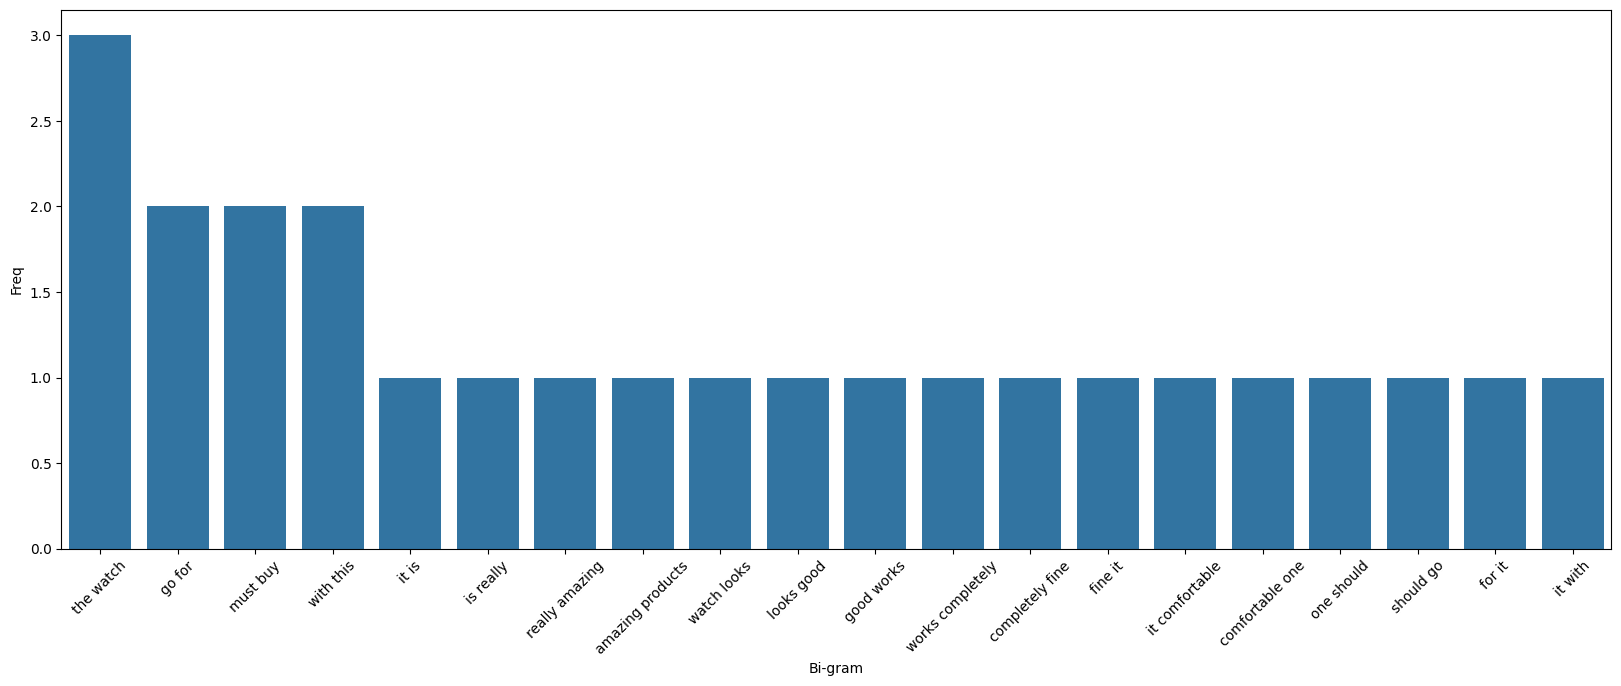

In [21]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns

top20_bigram=top2_df.iloc[0:20,:]
fig=plt.figure(figsize=(20,7))
plot=sns.barplot(x=top20_bigram['Bi-gram'],y=top20_bigram['Freq'])
plot.set_xticklabels(rotation=45,labels=top20_bigram["Bi-gram"])
plt.show()


In [22]:
#Tri-gram
def get_top_n3_words(corpus,n=None):
  vec1=CountVectorizer(ngram_range=(3,3),max_features=2000).fit(corpus)
  bag_of_words=vec1.transform(corpus)
  sum_words=bag_of_words.sum(axis=0)
  words_freq=[(word,sum_words[0,idx]) for word,idx in vec1.vocabulary_.items()]
  words_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)

  return words_freq[:n]

In [23]:
top3_words=get_top_n3_words(titan_nosw['review'],n=200) #top 200
top3_df=pd.DataFrame(top3_words)
top3_df.columns=['Tri-gram',"Freq"]
top3_df

,Tri-gram,Freq
0,really amazing products,1
1,watch looks goodworks,1
2,looks goodworks completely,1
3,goodworks completely fineits,1
4,completely fineits comfortableone,1
...,...,...
56,didnt see issue,1
57,see issue product,1
58,issue product love,1
59,product love tata,1


wordcloud

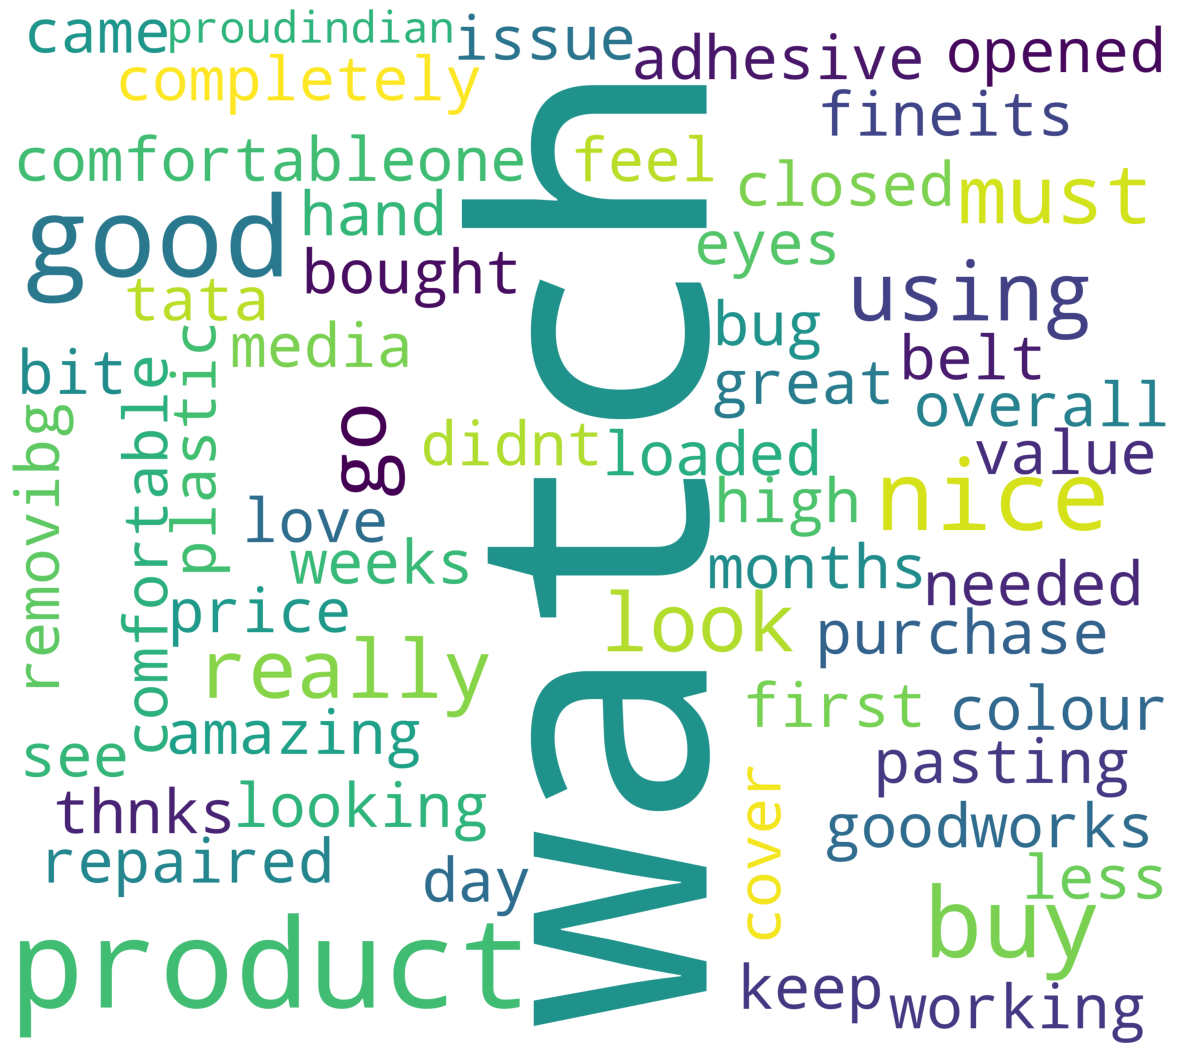

In [24]:
string_Total=" ".join(titan_nosw['review'])

#wordcloud for entire corpus
from wordcloud import WordCloud
plt.figure(figsize=(15,15))
plt.axis('off')
wordcloud_stw=WordCloud(background_color= 'white',width = 2800,height = 2500).generate(string_Total)
plt.imshow(wordcloud_stw)


Part of speech tagging

In [25]:
titan_sen=titan_nosw.copy()
titan_sen=[x.strip() for x in titan_sen.review]# strip for removing lead n tail chars/spaces
titan_sen=[x for x in titan_sen if x]
titan_sen[0:25]

['really amazing products',
 'watch looks goodworks completely fineits comfortableone go eyes closed',
 'media could loaded comfortable must buy product',
 'must buy watch',
 'good looking nice colour watch watch belt adhesive pasting good came weeks needed repaired keep using watch',
 'nice product go purchase value high bought thnks',
 'working first day opened removibg plastic cover',
 'really nice watch great look feel price could bit less bug overall good buy',
 'good product hand',
 'using watch months didnt see issue product love tata proudindian']

In [28]:
## part of speech tagging
# nlp = spacy.load('en)
nlp=spacy.load('en_core_web_sm')

one_block=titan_sen[9]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [29]:
one_block

'using watch months didnt see issue product love tata proudindian'

In [30]:
for token in doc_block[0:20]:
  print(token,token.pos_)

using VERB
watch NOUN
months NOUN
did AUX
nt PART
see VERB
issue NOUN
product NOUN
love NOUN
tata PROPN
proudindian PROPN


In [31]:
# filetring for nouns & verbs
nouns_verbs=[token.text for token in doc_block if token.pos_ in('NOUN','VERB')]
print(nouns_verbs[5:25])

['product', 'love']


In [35]:
nlp=spacy.load('en_core_web_sm')

one_block=titan_sen[7]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [36]:

for token in doc_block[0:20]:
  print(token,token.pos_)

really ADV
nice ADJ
watch AUX
great ADJ
look NOUN
feel VERB
price NOUN
could AUX
bit VERB
less ADJ
bug NOUN
overall ADJ
good ADJ
buy NOUN


In [39]:
# filetring for nouns & verbs
nouns_verbs=[token.text for token in doc_block if token.pos_ in('NOUN','VERB')]
print(nouns_verbs[5:9])

['buy']


In [40]:

import nltk
nltk.download('punkt')
text=" ".join(titan_nosw["review"])
text_tokens = word_tokenize(text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [41]:
text_tokens[:20]

['really',
 'amazing',
 'products',
 'watch',
 'looks',
 'goodworks',
 'completely',
 'fineits',
 'comfortableone',
 'go',
 'eyes',
 'closed',
 'media',
 'could',
 'loaded',
 'comfortable',
 'must',
 'buy',
 'product',
 'must']

In [42]:

len(text_tokens)

81


Sentence Scoring

In [44]:

from textblob import TextBlob
sentiment_lexicon = TextBlob
!pip install spacy
!python -m spacy download en_core_web_sm
import spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 25.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [45]:
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = {"good": 0.5, "bad": -0.5}

In [46]:
def calculate_sentiment(text):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [47]:
titan_nosw['sentiment_value']=titan_nosw['review'].apply(calculate_sentiment)

In [48]:
#word count
titan_nosw['word_count']=titan_nosw['review'].str.split().apply(len)
titan_nosw['word_count'].head(25)

0     3
1     9
2     7
3     3
4    17
5     8
6     7
7    14
8     3
9    10
Name: word_count, dtype: int64

In [49]:
titan_nosw.sort_values(by='sentiment_value').tail(15)

,review,sentiment_value,word_count
0,really amazing products,0.0,3
1,watch looks goodworks completely fineits comfortableone go eyes closed,0.0,9
2,media could loaded comfortable must buy product,0.0,7
3,must buy watch,0.0,3
5,nice product go purchase value high bought thnks,0.0,8
6,working first day opened removibg plastic cover,0.0,7
9,using watch months didnt see issue product love tata proudindian,0.0,10
7,really nice watch great look feel price could bit less bug overall good buy,0.5,14
8,good product hand,0.5,3
4,good looking nice colour watch watch belt adhesive pasting good came weeks needed repaired keep using watch,1.0,17


In [50]:
titan_nosw.sort_values(by='sentiment_value').head(10)

,review,sentiment_value,word_count
0,really amazing products,0.0,3
1,watch looks goodworks completely fineits comfortableone go eyes closed,0.0,9
2,media could loaded comfortable must buy product,0.0,7
3,must buy watch,0.0,3
5,nice product go purchase value high bought thnks,0.0,8
6,working first day opened removibg plastic cover,0.0,7
9,using watch months didnt see issue product love tata proudindian,0.0,10
7,really nice watch great look feel price could bit less bug overall good buy,0.5,14
8,good product hand,0.5,3
4,good looking nice colour watch watch belt adhesive pasting good came weeks needed repaired keep using watch,1.0,17


In [51]:
#sentiment score of the whole review
titan_nosw['sentiment_value'].describe()

count    10.000000
mean      0.200000
std       0.349603
min       0.000000
25%       0.000000
50%       0.000000
75%       0.375000
max       1.000000
Name: sentiment_value, dtype: float64

In [ ]:
titan_nosw[titan_nosw['sentiment_value']<0]

In [54]:
titan_nosw[titan_nosw['sentiment_value']>0]

,review,sentiment_value,word_count
4,good looking nice colour watch watch belt adhesive pasting good came weeks needed repaired keep using watch,1.0,17
7,really nice watch great look feel price could bit less bug overall good buy,0.5,14
8,good product hand,0.5,3


In [55]:
titan_nosw[titan_nosw['sentiment_value']==0]

,review,sentiment_value,word_count
0,really amazing products,0.0,3
1,watch looks goodworks completely fineits comfortableone go eyes closed,0.0,9
2,media could loaded comfortable must buy product,0.0,7
3,must buy watch,0.0,3
5,nice product go purchase value high bought thnks,0.0,8
6,working first day opened removibg plastic cover,0.0,7
9,using watch months didnt see issue product love tata proudindian,0.0,10


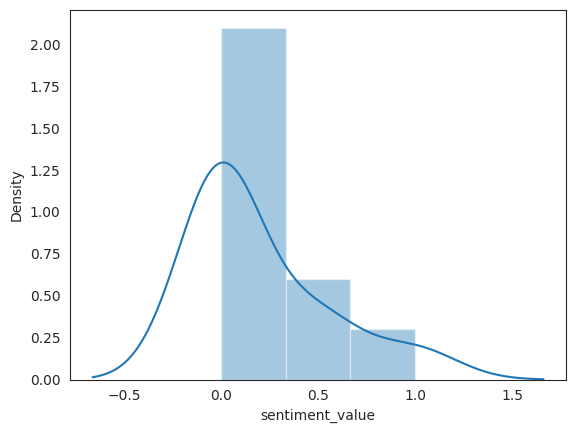

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style(style='white')
sns.distplot(titan_nosw['sentiment_value'])
plt.show()

<Axes: xlabel='index', ylabel='sentiment_value'>

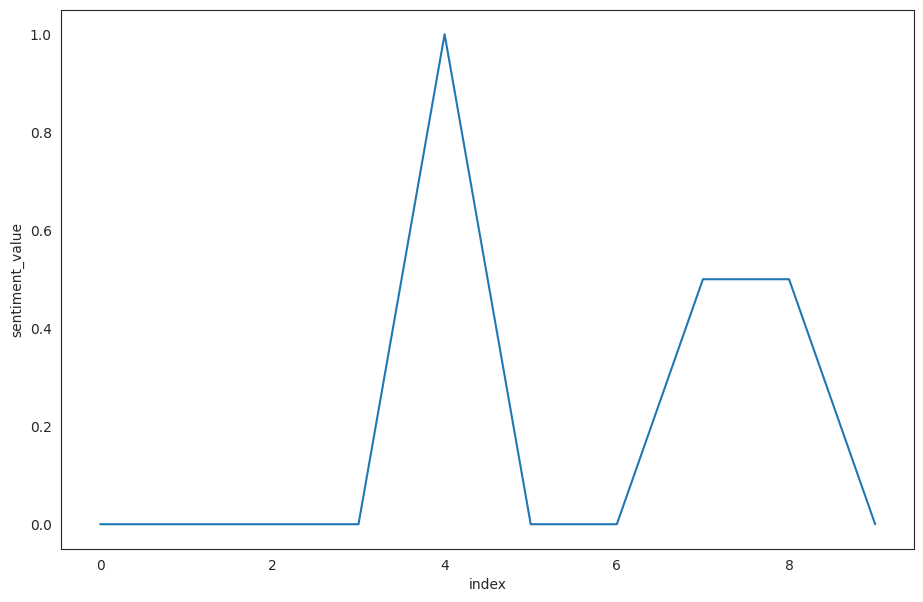

In [57]:
titan_line=titan_nosw.copy()
titan_line['index']=range(0,len(titan_line))
plt.figure(figsize=(11,7))
sns.lineplot(y='sentiment_value',x='index',data=titan_line)


Subjectivity & Polarity

In [58]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

In [62]:
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["review"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

In [63]:
# Adding features Subjectivity & Polarity to dataset
titan_sbpt=titan_nosw.copy()
titan_sbpt[["subjectivity", "polarity"]] = titan_nosw.apply(sentiment_analysis, axis=1)
titan_sbpt.head(25)

,review,sentiment_value,word_count,subjectivity,polarity
0,really amazing products,0.0,3,0.900000,0.600000
1,watch looks goodworks completely fineits comfortableone go eyes closed,0.0,9,0.250000,0.000000
2,media could loaded comfortable must buy product,0.0,7,0.800000,0.400000
3,must buy watch,0.0,3,0.000000,0.000000
4,good looking nice colour watch watch belt adhesive pasting good came weeks needed repaired keep using watch,1.0,17,0.733333,0.666667
5,nice product go purchase value high bought thnks,0.0,8,0.770000,0.380000
6,working first day opened removibg plastic cover,0.0,7,0.333333,0.250000
7,really nice watch great look feel price could bit less bug overall good buy,0.5,14,0.483333,0.386667
8,good product hand,0.5,3,0.600000,0.700000
9,using watch months didnt see issue product love tata proudindian,0.0,10,0.600000,0.500000


In [64]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

In [65]:

titan_sbpt["review_kind"] = titan_sbpt["polarity"].apply(analysis)
titan_sbpt

,review,sentiment_value,word_count,subjectivity,polarity,review_kind
0,really amazing products,0.0,3,0.900000,0.600000,Positive
1,watch looks goodworks completely fineits comfortableone go eyes closed,0.0,9,0.250000,0.000000,Neutral
2,media could loaded comfortable must buy product,0.0,7,0.800000,0.400000,Positive
3,must buy watch,0.0,3,0.000000,0.000000,Neutral
4,good looking nice colour watch watch belt adhesive pasting good came weeks needed repaired keep using watch,1.0,17,0.733333,0.666667,Positive
5,nice product go purchase value high bought thnks,0.0,8,0.770000,0.380000,Positive
6,working first day opened removibg plastic cover,0.0,7,0.333333,0.250000,Positive
7,really nice watch great look feel price could bit less bug overall good buy,0.5,14,0.483333,0.386667,Positive
8,good product hand,0.5,3,0.600000,0.700000,Positive
9,using watch months didnt see issue product love tata proudindian,0.0,10,0.600000,0.500000,Positive


In [66]:
titan_sbpt.describe()

,sentiment_value,word_count,subjectivity,polarity
count,10.000000,10.000000,10.000000,10.000000
mean,0.200000,8.100000,0.547000,0.388333
std,0.349603,4.701064,0.282019,0.247841
min,0.000000,3.000000,0.000000,0.000000
25%,0.000000,4.000000,0.370833,0.282500
50%,0.000000,7.500000,0.600000,0.393333
75%,0.375000,9.750000,0.760833,0.575000
max,1.000000,17.000000,0.900000,0.700000


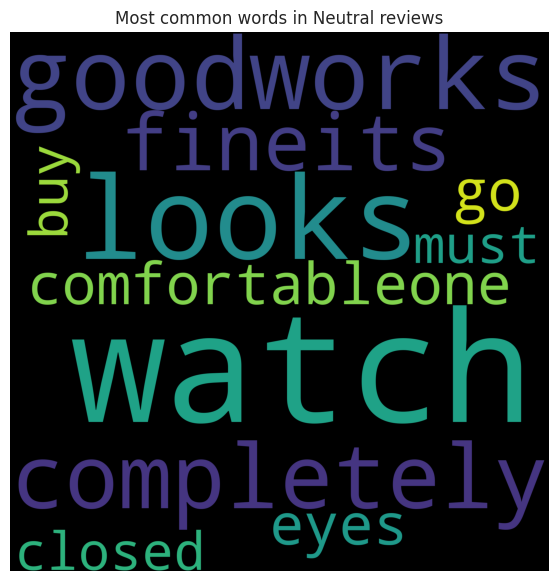

In [68]:
#neutral tweets wordcloud
wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(titan_sbpt.loc[titan_sbpt['review_kind']=='Neutral','review'].tolist()))
plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.title("Most common words in Neutral reviews")
plt.axis('off')
plt.show()

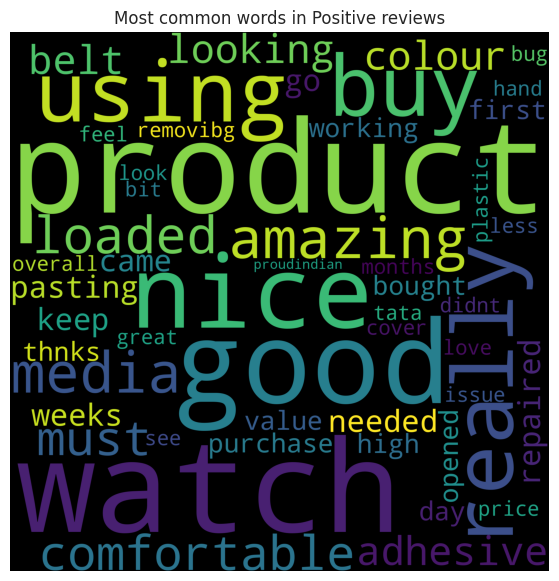

In [69]:
#positive tweets wordcloud
wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(titan_sbpt.loc[titan_sbpt['review_kind']=='Positive','review'].tolist()))
plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.title("Most common words in Positive reviews")
plt.axis('off')
plt.show()

Conclusion:

In [71]:
titan_sbpt['review_kind'].value_counts()

Positive    8
Neutral     2
Name: review_kind, dtype: int64

There are more positive reviews for the items than neutral